In [1]:
%matplotlib inline

In [56]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pyodbc

# Data Acqusition

In [6]:
cats_and_dogs = pd.DataFrame({'cats':[1,2,3,4,5,6], 'dogs':[1,2,3,4,5,6]})

### Panda data frame - 2D matrix (N,M) with indices

In [7]:
type(cats_and_dogs)

pandas.core.frame.DataFrame

In [8]:
cats_and_dogs.shape

(6, 2)

### Panda Series -  1 D list of  data  with table column

In [9]:
pd.Series([1,5,10,89,96])

0     1
1     5
2    10
3    89
4    96
dtype: int64

In [13]:
accidents_data = pd.read_csv("accidents.csv")

In [17]:
accidents_data

,Miles from Home,% of Accidents
0,less than 1,23
1,1 to 5,29
2,6 to 10,17
3,11 to 15,8
4,16 to 20,6
5,over 20,17


In [15]:
accidents_data['Miles from Home']

0    less than 1
1         1 to 5
2        6 to 10
3       11 to 15
4       16 to 20
5        over 20
Name: Miles from Home, dtype: object

In [16]:
accidents_data.loc[0]

Miles from Home    less than 1
% of Accidents              23
Name: 0, dtype: object

In [18]:
accidents_data.loc[3,"% of Accidents"]

8

### When reading data is important that we first check shape (rows, columns) and dtypes of the data

In [20]:
accidents_data.shape

(6, 2)

In [22]:
accidents_data.dtypes

Miles from Home    object
% of Accidents      int64
dtype: object

In [23]:
accidents_data.index

RangeIndex(start=0, stop=6, step=1)

In [24]:
accidents_data.columns

Index(['Miles from Home', '% of Accidents'], dtype='object')

### Pandas reads and links

In [27]:
car_evaluation = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data",header = None)

In [33]:
car_evaluation

,buying,maint,doors,persons,lug_boot,safety,acceptability
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [30]:
car_evaluation.columns = [ 'buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety','acceptability']

In [32]:
car_evaluation.dtypes

buying           object
maint            object
doors            object
persons          object
lug_boot         object
safety           object
acceptability    object
dtype: object

In [36]:
car_evaluation['doors'].unique()

array(['2', '3', '4', '5more'], dtype=object)

In [37]:
car_evaluation.groupby('doors').size()

doors
2        432
3        432
4        432
5more    432
dtype: int64

In [39]:
green_trip_data = pd.read_excel("green_tripdata_2015-09.xls")

In [40]:
green_trip_data

,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,...,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type
0,2,2015-09-01 00:02:34,2015-09-01 00:02:38,N,5,-73.979485,40.684956,-73.979431,40.685020,1,...,7.8,0.0,0.0,1.95,0.0,NaN,0.0,9.75,1,2
1,2,2015-09-01 00:04:20,2015-09-01 00:04:24,N,5,-74.010796,40.912216,-74.010780,40.912212,1,...,45.0,0.0,0.0,0.00,0.0,NaN,0.0,45.00,1,2
2,2,2015-09-01 00:01:50,2015-09-01 00:04:24,N,1,-73.921410,40.766708,-73.914413,40.764687,1,...,4.0,0.5,0.5,0.50,0.0,NaN,0.3,5.80,1,1
3,2,2015-09-01 00:02:36,2015-09-01 00:06:42,N,1,-73.921387,40.766678,-73.931427,40.771584,1,...,5.0,0.5,0.5,0.00,0.0,NaN,0.3,6.30,2,1
4,2,2015-09-01 00:00:14,2015-09-01 00:04:20,N,1,-73.955482,40.714046,-73.944412,40.714729,1,...,5.0,0.5,0.5,0.00,0.0,NaN,0.3,6.30,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65530,2,2015-09-02 16:51:59,2015-09-02 17:04:00,N,1,-73.829605,40.759716,-73.832214,40.751514,1,...,9.0,1.0,0.5,0.00,0.0,NaN,0.3,10.80,2,1
65531,2,2015-09-02 16:53:51,2015-09-02 17:04:32,N,1,-73.962112,40.805710,-73.984970,40.769550,1,...,10.5,1.0,0.5,2.46,0.0,NaN,0.3,14.76,1,1
65532,2,2015-09-02 16:57:21,2015-09-02 17:05:03,N,1,-73.829941,40.713718,-73.831917,40.702145,1,...,7.0,1.0,0.5,2.20,0.0,NaN,0.3,11.00,1,1
65533,2,2015-09-02 16:51:42,2015-09-02 17:05:28,N,1,-73.860748,40.832661,-73.845169,40.845306,1,...,10.5,1.0,0.5,2.46,0.0,NaN,0.3,14.76,1,1


In [41]:
green_trip_data.dtypes

VendorID                          int64
lpep_pickup_datetime     datetime64[ns]
Lpep_dropoff_datetime    datetime64[ns]
Store_and_fwd_flag               object
RateCodeID                        int64
Pickup_longitude                float64
Pickup_latitude                 float64
Dropoff_longitude               float64
Dropoff_latitude                float64
Passenger_count                   int64
Trip_distance                   float64
Fare_amount                     float64
Extra                           float64
MTA_tax                         float64
Tip_amount                      float64
Tolls_amount                    float64
Ehail_fee                       float64
improvement_surcharge           float64
Total_amount                    float64
Payment_type                      int64
Trip_type                         int64
dtype: object

### Check if the yaer is only 2015 in the set

In [43]:
green_trip_data['lpep_pickup_datetime'].dt.year.unique(),green_trip_data['lpep_pickup_datetime'].dt.month.unique()

(array([2015], dtype=int64), array([9], dtype=int64))

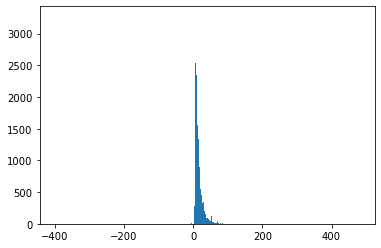

In [48]:
plt.hist(green_trip_data['Total_amount'],bins = 'fd')
plt.show()

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 11., 97.]),
 array([-400. , -360.1, -320.2, -280.3, -240.4, -200.5, -160.6, -120.7,
         -80.8,  -40.9,   -1. ]),
 <BarContainer object of 10 artists>)

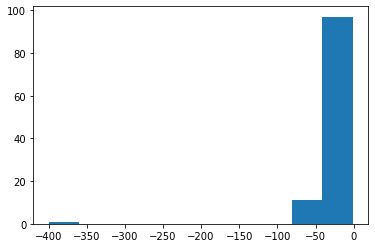

In [49]:
plt.hist(green_trip_data[green_trip_data['Total_amount'] <0]['Total_amount'])

In [53]:
books = pd.read_json('https://openlibrary.org/api/books?bibkeys=ISBN:9780345354907,ISBN:0881847690,LCCN:2005041555,ISBN:0060957905&format=json',orient = 'index')

In [54]:
books

,bib_key,info_url,preview,preview_url,thumbnail_url
ISBN:9780345354907,ISBN:9780345354907,https://openlibrary.org/books/OL9831606M/The_C...,borrow,https://archive.org/details/caseofcharlesdex00...,https://covers.openlibrary.org/b/id/207586-S.jpg
ISBN:0881847690,ISBN:0881847690,https://openlibrary.org/books/OL22232644M/Watc...,borrow,https://archive.org/details/watchersoutoftim00...,https://covers.openlibrary.org/b/id/9871313-S.jpg
LCCN:2005041555,LCCN:2005041555,https://openlibrary.org/books/OL3421202M/At_th...,borrow,https://archive.org/details/atmountainsofmad00...,https://covers.openlibrary.org/b/id/8259841-S.jpg
ISBN:0060957905,ISBN:0060957905,https://openlibrary.org/books/OL6784868M/Tales...,noview,https://openlibrary.org/books/OL6784868M/Tales...,https://covers.openlibrary.org/b/id/676505-S.jpg


In [55]:
books.loc['LCCN:2005041555','preview_url']

'https://archive.org/details/atmountainsofmad00love_0'

In [57]:
pyodbc

<module 'pyodbc' from 'D:\\Anaconda3\\lib\\site-packages\\pyodbc.cp38-win_amd64.pyd'>